In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [42]:
import pandas as pd
housing_data1=pd.read_csv('gdrive/My Drive/HousingPrices.csv')

housing_data2=pd.read_csv('gdrive/My Drive/HousingPrices2021.csv')

In [43]:
housing_data_ = housing_data1[housing_data1['Year'] >= 2000]

In [44]:
housing_data1.describe

<bound method NDFrame.describe of     STATISTIC           Statistic Label  TLIST(A1)  Year C02343V02817  \
0     HSA06C1          New House Prices       1975  1975            -   
1     HSA06C1          New House Prices       1975  1975           01   
2     HSA06C1          New House Prices       1975  1975           02   
3     HSA06C1          New House Prices       1975  1975           03   
4     HSA06C1          New House Prices       1975  1975           04   
..        ...                       ...        ...   ...          ...   
583   HSA06C2  Second Hand House Prices       2016  2016           02   
584   HSA06C2  Second Hand House Prices       2016  2016           03   
585   HSA06C2  Second Hand House Prices       2016  2016           04   
586   HSA06C2  Second Hand House Prices       2016  2016           05   
587   HSA06C2  Second Hand House Prices       2016  2016           06   

            Area  UNIT     VALUE  
0       National  Euro   13254.0  
1         Dublin  Euro   13137.0  
2           Cork  Euro   12921.0  
3         Galway  Euro   14420.0  
4       Limerick  Euro   13594.0  
..           ...   ...       ...  
583         Cork  Euro  240683.0  
584       Galway  Euro  214645.0  
585     Limerick  Euro  192721.0  
586    Waterford  Euro  179609.0  
587  Other areas  Euro  201272.0  

[588 rows x 8 columns]>

In [45]:
housing_data1.shape

(588, 8)

In [46]:
housing_data2.shape

(476745, 9)

In [51]:
print(housing_data1.head())
print(housing_data2.head())

  STATISTIC   Statistic Label  TLIST(A1)  Year C02343V02817      Area  UNIT  \
0   HSA06C1  New House Prices       1975  1975            -  National  Euro   
1   HSA06C1  New House Prices       1975  1975           01    Dublin  Euro   
2   HSA06C1  New House Prices       1975  1975           02      Cork  Euro   
3   HSA06C1  New House Prices       1975  1975           03    Galway  Euro   
4   HSA06C1  New House Prices       1975  1975           04  Limerick  Euro   

     VALUE  
0  13254.0  
1  13137.0  
2  12921.0  
3  14420.0  
4  13594.0  
    SALE_DATE                                         ADDRESS POSTAL_CODE  \
0  2010-01-01          5 Braemor Drive, Churchtown, Co.Dublin         NaN   
1  2010-01-03  134 Ashewood Walk, Summerhill Lane, Portlaoise         NaN   
2  2010-01-04             1 Meadow Avenue, Dundrum, Dublin 14         NaN   
3  2010-01-04                         1 The Haven, Mornington         NaN   
4  2010-01-04                   11 Melville Heights, Kilkenny 

In [52]:
housing_data2['Year'] = pd.to_datetime(housing_data2['SALE_DATE']).dt.year

In [53]:
print("Mapping counties to areas...")
county_map = {
    'Dublin': 'Dublin',
    'Cork': 'Cork',
    'Galway': 'Galway',
    'Limerick': 'Limerick',
    'Waterford': 'Waterford',
    'Meath': 'Other areas',
    'Kildare': 'Other areas',
    'Wicklow': 'Other areas',
    'Laois': 'Other areas',
    'Kilkenny': 'Other areas'
}

Mapping counties to areas...


In [54]:
housing_data2['Area'] = housing_data2['COUNTY'].map(county_map)

In [55]:
housing_data2['Area'] = housing_data2['Area'].fillna('Other areas')

In [58]:
#Checking the property types between second hand or new houses
housing_data2['Statistic Label'] = 'Second Hand House Prices'
try:
    new_mask = housing_data2['PROPERTY_DESC'].str.contains('New', case=False)
    housing_data2.loc[new_mask, 'Statistic Label'] = 'New House Prices'
except:
    print("Warning: Couldn't determine all property types, some might be incorrect")



In [59]:
housing_data2.rename(columns={'SALE_PRICE': 'VALUE'}, inplace=True)

In [60]:
housing_data2_avg = housing_data2.groupby(['Year', 'Area', 'Statistic Label'])['VALUE'].mean().reset_index()


In [65]:
print("Aggregating transaction data...")
housing_data2_avg = housing_data2.groupby(['Year', 'Area', 'Statistic Label'])['VALUE'].mean().round(0).reset_index()


Aggregating transaction data...


In [66]:

housing_data2_avg['Property Type'] = housing_data2_avg['Statistic Label']



housing_data1_simple = housing_data1[['Year', 'Area', 'Statistic Label', 'VALUE']].copy()
housing_data1_simple.rename(columns={'Statistic Label': 'Property Type'}, inplace=True)

housing_data2_simple = housing_data2_avg[['Year', 'Area', 'Property Type', 'VALUE']].copy()

print("First dataset after simplification:")
print(housing_data1_simple.head())
print("Second dataset after simplification:")
print(housing_data2_simple.head())



First dataset after simplification:
   Year      Area     Property Type    VALUE
0  1975  National  New House Prices  13254.0
1  1975    Dublin  New House Prices  13137.0
2  1975      Cork  New House Prices  12921.0
3  1975    Galway  New House Prices  14420.0
4  1975  Limerick  New House Prices  13594.0
Second dataset after simplification:
   Year    Area             Property Type     VALUE
0  2010    Cork          New House Prices  248630.0
1  2010    Cork  Second Hand House Prices  224531.0
2  2010  Dublin          New House Prices  249783.0
3  2010  Dublin  Second Hand House Prices  352774.0
4  2010  Galway          New House Prices  207723.0


In [76]:
print("different the datasets are in the overlap years...")
data1_overlap = housing_data1_simple[(housing_data1_simple['Year'] >= 2010) & (housing_data1_simple['Year'] <= 2016)]
data2_overlap = housing_data2_simple[(housing_data2_simple['Year'] >= 2010) & (housing_data2_simple['Year'] <= 2016)]
data1_avg = data1_overlap.groupby(['Area', 'Property Type'])['VALUE'].mean()
data2_avg = data2_overlap.groupby(['Area', 'Property Type'])['VALUE'].mean()


print(data1_avg)

print(data2_avg)


avg_diff_pct = ((data2_avg - data1_avg) / data1_avg * 100)
print("Percentage difference:")
print(avg_diff_pct)


different the datasets are in the overlap years...
Area         Property Type           
Cork         New House Prices            250260.428571
             Second Hand House Prices    226159.714286
Dublin       New House Prices            316790.428571
             Second Hand House Prices    340148.285714
Galway       New House Prices            229692.428571
             Second Hand House Prices    210513.857143
Limerick     New House Prices            220100.000000
             Second Hand House Prices    189124.285714
National     New House Prices            249785.000000
             Second Hand House Prices    263146.714286
Other areas  New House Prices            226879.714286
             Second Hand House Prices    193537.000000
Waterford    New House Prices            199060.428571
             Second Hand House Prices    176053.285714
Name: VALUE, dtype: float64
Area         Property Type           
Cork         New House Prices            202782.571429
             Second 

In [85]:
combined_data = pd.concat([
    housing_data1_simple[housing_data1_simple['Year'] < 2010],
    housing_data2_simple
], ignore_index=True)


In [86]:
combined_data.shape


min_year = combined_data['Year'].min()
max_year = combined_data['Year'].max()

print(min_year, max_year)

1975 2021


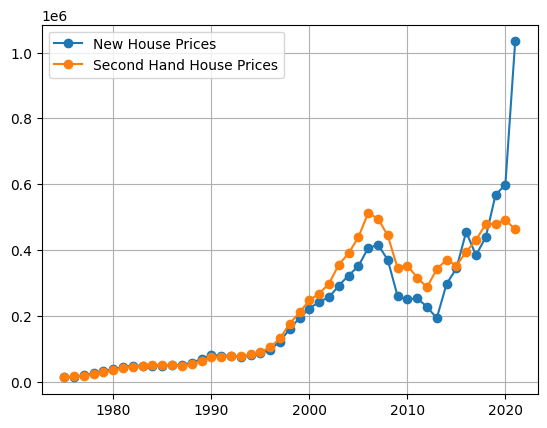

In [90]:
#Checking the Dublin data for now just to check
dublin_data = combined_data[combined_data['Area'] == 'Dublin']
for prop_type in dublin_data['Property Type'].unique():
    data = dublin_data[dublin_data['Property Type'] == prop_type]
    plt.plot(data['Year'], data['VALUE'], marker='o', label=prop_type)


plt.legend()
plt.grid(True)
plt.show()


In [ ]:
combined_data.to_csv('combined_housing_data.csv', index=False)


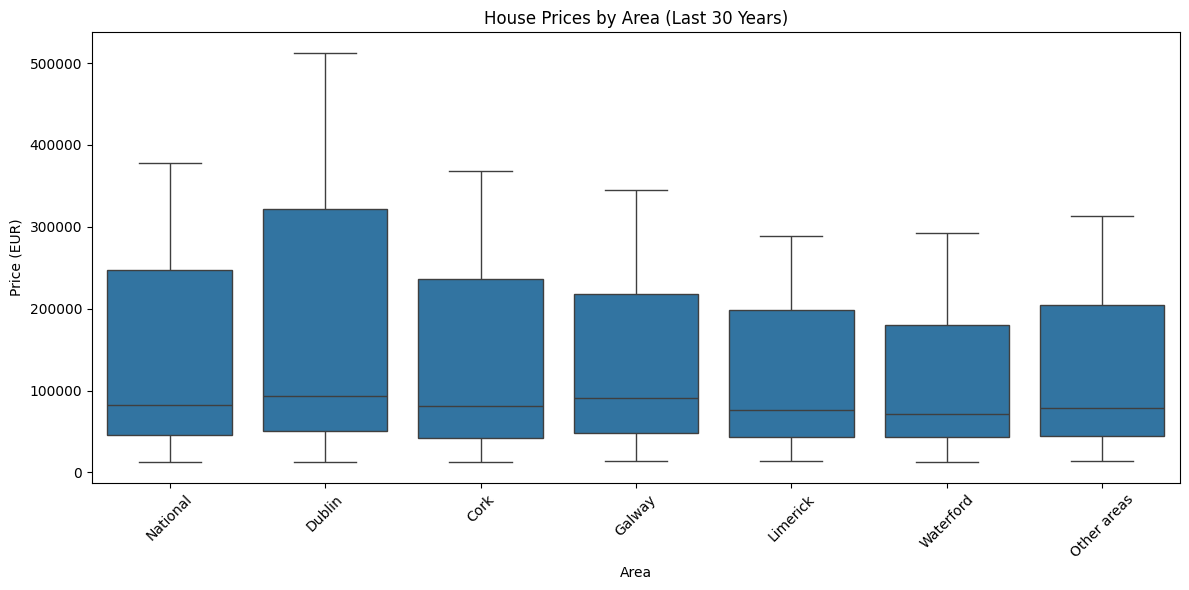

Summary statistics by area:
             count           mean            std      min       25%      50%  \
Area                                                                           
Cork          84.0  133477.915972  103825.245647  12921.0  42697.75  81251.5   
Dublin        84.0  177240.880952  145713.369373  12774.0  50078.00  92998.5   
Galway        84.0  133233.380258   96771.833234  14420.0  48205.50  90535.0   
Limerick      84.0  117364.725496   84495.700000  13594.0  43802.00  75802.0   
National      84.0  140816.059524  109723.352707  12478.0  46149.50  81811.5   
Other areas   84.0  122495.023115   90994.088088  13833.0  44082.25  78172.5   
Waterford     84.0  114232.606449   85529.389896  12636.0  43049.25  71629.0   

                   75%       max  
Area                              
Cork         236069.25  368523.0  
Dublin       321367.25  512461.0  
Galway       218089.00  344958.0  
Limerick     199025.25  288202.0  
National     247066.50  377850.0  
Other 

Checking housing prices by area:
                      mean   median      min       max  count
Area                                                         
Dublin       177240.880952  92998.5  12774.0  512461.0     84
National     140816.059524  81811.5  12478.0  377850.0     84
Cork         133477.915972  81251.5  12921.0  368523.0     84
Galway       133233.380258  90535.0  14420.0  344958.0     84
Other areas  122495.023115  78172.5  13833.0  313487.0     84
Limerick     117364.725496  75802.0  13594.0  288202.0     84
Waterford    114232.606449  71629.0  12636.0  292057.0     84



House prices by year:
               mean    median       min            max  count
Year                                                         
1975   56404.407743   13713.5   12478.0  134122.941681     14
1976   15322.071429   15322.5   13900.0   17842.000000     14
1977   18432.000000   18338.5   15980.0   21715.000000     14
1978   22864.214286   22649.5   19736.0   27862.000000     14
1979   28060.500000   28399.0   22565.0   32005.000000     14
1980   32319.500000   32820.5   25966.0   37822.000000     14
1981   37559.214286   37625.5   29994.0   44456.000000     14
1982   40682.428571   41024.5   31957.0   48886.000000     14
1983   42053.857143   42537.5   33706.0   48249.000000     14
1984   43811.000000   43884.5   37032.0   50936.000000     14
1985   45011.500000   44784.5   40210.0   50382.000000     14
1986   46525.642857   47152.0   38473.0   51450.000000     14
1987   46264.000000   46378.5   42243.0   50864.000000     14
1988   50298.428571   50053.0   43318.0   57994